In [2]:
from astropy.modeling.models import Gaussian2D
import numpy as np
from photutils.datasets import make_noise_image
import matplotlib.pyplot as plt

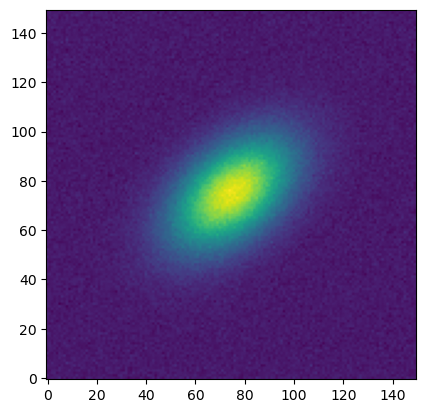

In [3]:
g = Gaussian2D(100, 75, 75, 20, 12, theta=40 * np.pi/180)
ny = nx = 150
y, x = np.mgrid[0:ny, 0:nx]
noise = make_noise_image((ny,nx), distribution='gaussian', mean=0, stddev=2, seed=1234)
# plt.imshow(g(x,y))
data = g(x,y) + noise
plt.imshow(data, origin='lower')

(<matplotlib.patches.Ellipse at 0x7fbe911e3d60>,)

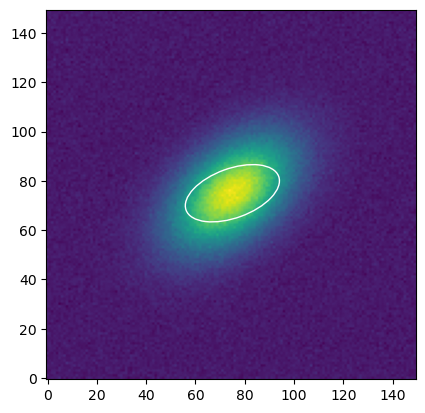

In [4]:
from photutils.isophote import EllipseGeometry
from photutils.aperture import EllipticalAperture

geometry = EllipseGeometry(x0=75, y0=75, sma=20, eps=0.5, pa=20.*np.pi/180.)
aperture = EllipticalAperture((geometry.x0, geometry.y0), geometry.sma, geometry.sma * (1 - geometry.eps), geometry.pa)
plt.imshow(data, origin='lower')
aperture.plot(color='white')

In [5]:
from photutils.isophote import Ellipse
ellipse = Ellipse(data, geometry)
isolist = ellipse.fit_image()
print(len(isolist))

54


In [6]:
print(isolist.to_table())

       sma                intens            intens_err      ... niter stop_code
                                                            ...                
------------------ ------------------- -------------------- ... ----- ---------
               0.0   103.3660739798964                  0.0 ...     0         0
0.5346972612827552  101.85768917501012 0.030160150033131657 ...    10         0
0.5881669874110307  101.68151089144688 0.028309638760206368 ...    10         0
0.6469836861521338  101.50567111801693  0.02586692782374305 ...    11         0
0.7116820547673471  101.37211021505276  0.03225426193013909 ...    10         0
0.7828502602440819  101.18632454985836  0.03615817023087365 ...    10         0
0.8611352862684901  100.97031374749008  0.03259882604264737 ...    10         0
0.9472488148953392  100.77982197968798 0.038743630836230114 ...    12         0
1.0419736963848731  100.42073747546361  0.07914230840262942 ...    19         0
1.1461710660233606  100.28339743903287  

In [7]:
from photutils.isophote import build_ellipse_model
model_image = build_ellipse_model(data.shape, isolist)
residual = data - model_image


Text(0.5, 1.0, 'Residual')

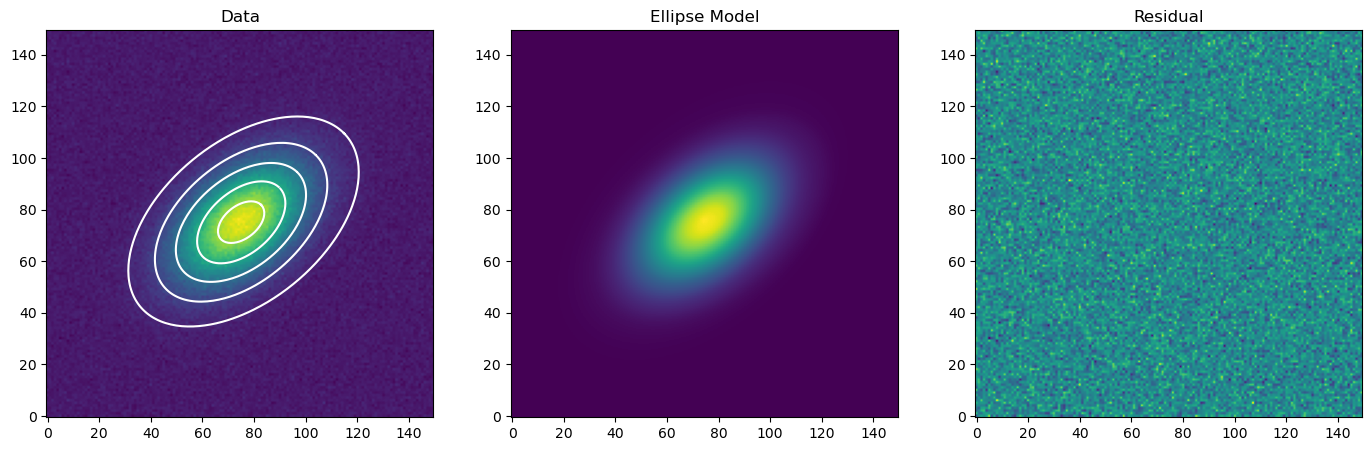

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 5), nrows=1, ncols=3)
fig.subplots_adjust(left=0.04, right=0.98, bottom=0.02, top=0.98)
ax1.imshow(data, origin='lower')
ax1.set_title('Data')

smas = np.linspace(10, 50, 5)
for sma in smas:
    iso = isolist.get_closest(sma)
    x, y, = iso.sampled_coordinates()
    ax1.plot(x, y, color='white')

ax2.imshow(model_image, origin='lower')
ax2.set_title('Ellipse Model')

ax3.imshow(residual, origin='lower')
ax3.set_title('Residual')